#  MODELLING  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv('Twitter_stock_final_dataset_new.csv')
df.head()

,Year,Month,Day,StockName,Positive,Negative,Neutral,Total Tweets,Close,Volume,Open,High,Low,Day_of_week
0,2020,1,1,apple,10,2,8,20,75.0875,135647440.0,74.0600,75.1500,73.7975,Wednesday
1,2020,1,1,microsoft,9,0,11,20,160.6200,22634550.0,158.7800,160.7300,158.3300,Wednesday
2,2020,1,1,tesla,17,3,3,23,86.0520,47791930.0,84.9000,86.1391,84.3420,Wednesday
3,2020,1,1,nvidia,1,0,0,1,59.9775,23767876.0,59.6875,59.9775,59.1800,Wednesday
4,2020,1,1,paypal,1,0,1,2,110.7500,7419283.0,109.4700,111.2100,109.2750,Wednesday


In [3]:
df2 = df

In [4]:
Date = ['Year', 'Month','Day']
df2.sort_values(by = Date, inplace = True, ascending = True)

In [5]:
# seperate independent vs dependent vriables

#cols = ['Close', 'High', 'Low', 'Volume','Open','Day_of_week']
X_reg2 = df2.drop('Close', axis = 1).values
y_reg2 = df2.Close.values

In [6]:
df_X = pd.DataFrame(X_reg2)#, columns=['Column1', 'Column2'] 
df_X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2020,1,1,apple,10,2,8,20,135647440.0,74.06,75.15,73.7975,Wednesday
1,2020,1,1,microsoft,9,0,11,20,22634550.0,158.78,160.73,158.33,Wednesday
2,2020,1,1,tesla,17,3,3,23,47791930.0,84.9,86.1391,84.342,Wednesday
3,2020,1,1,nvidia,1,0,0,1,23767876.0,59.6875,59.9775,59.18,Wednesday
4,2020,1,1,paypal,1,0,1,2,7419283.0,109.47,111.21,109.275,Wednesday


In [7]:
#LABEL ENCODE
# Encoding the Independent or ohject variable Day_of_week
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

regEnc = LabelEncoder()

X_reg2[:, -1] = regEnc.fit_transform(X_reg2[:, -1]) #Day_of_week

X_reg2[:, 3] = regEnc.fit_transform(X_reg2[:, 3]) #stockName

In [8]:
# That makes the train_set with the first 80% of the data, and the test_set with rest 20% of the data.

Xtrain_set, Xtest_set= np.split(X_reg2, [int(0.8 * len(X_reg2))])

ytrain_set, ytest_set= np.split(y_reg2, [int(0.8 * len(y_reg2))])

In [9]:
print('X shapes for train and test are: ',Xtrain_set.shape, Xtest_set.shape, 'respectively')
print('X shapes for train and test are: ',ytrain_set.shape, ytest_set.shape, 'respectively')

X shapes for train and test are:  (2386, 13) (597, 13) respectively
X shapes for train and test are:  (2386,) (597,) respectively


In [10]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg = reg.fit(Xtrain_set,ytrain_set)

y_Lpred = reg.predict(Xtest_set)

In [11]:
#rmse
import math
from sklearn import metrics


mse =np.square(np.subtract(ytest_set, y_Lpred)).mean()
rmse = math.sqrt(mse)
print('rmse: ', rmse)

#Accuracy
print('Mean absolute error: ', metrics.mean_absolute_error(ytest_set, y_Lpred))

#r2_score
print('The r2_score: ', metrics.r2_score(ytest_set, y_Lpred))

rmse:  3.21915272492018
Mean absolute error:  2.0020878617333757
The r2_score:  0.9997137803863846


In [14]:
result = pd.DataFrame({'Actual': ytest_set.flatten(), 'Predicted': y_Lpred.flatten()})
result

,Actual,Predicted
0,126.543333,126.279739
1,248.910000,248.870583
2,597.920000,592.317572
3,154.052500,153.637158
4,254.355000,253.247972
...,...,...
592,730.170000,733.011441
593,211.130000,210.532939
594,269.910000,270.088517
595,212.460000,211.812669


In [15]:
result.to_csv("actualVpred.csv", index = False)

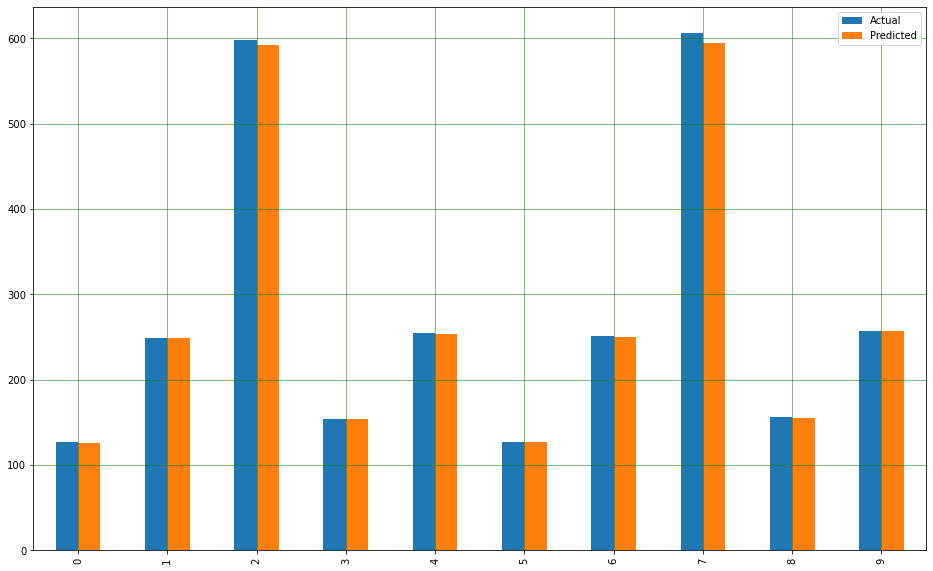

In [19]:
result2 = result.head(10)
result2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### further check
Drop High, low, Open and volume

In [20]:
# cols = ['Close', 'High', 'Low', 'Volume','Open','Day_of_week']
# X_reg3 = df2.drop(cols, axis = 1).values
# y_reg3 = df2['Close'].values

X_reg3 = X_reg2
y_reg3 = y_reg2

In [21]:
X_reg2.shape

(2983, 13)

In [22]:
X_reg3.shape

(2983, 13)

In [23]:
print(y_reg2.shape, y_reg3.shape)

(2983,) (2983,)


In [24]:
#Check the new index positions of variables
# df_X = pd.DataFrame(X_reg3)#, columns=['Column1', 'Column2'] 
# df_X.head()

In [25]:
# #Label encode the categorical variables

# X_reg3[:, -1] = regEnc.fit_transform(X_reg3[:, -1]) #Day_of_week

# X_reg3[:, 3] = regEnc.fit_transform(X_reg3[:, 3]) #stockName

In [26]:
#Split the new data into training and testing sets

Xtrain_set3, Xtest_set3= np.split(X_reg3, [int(0.8 * len(X_reg3))])
ytrain_set3, ytest_set3= np.split(y_reg3, [int(0.8 * len(y_reg3))])

In [27]:
#Fit the model

reg = reg.fit(Xtrain_set3,ytrain_set3)

y_Lpred3 = reg.predict(Xtest_set3)

In [28]:
#Scores

print('SCORES----')
print()
mse =np.square(np.subtract(ytest_set3, y_Lpred3)).mean()
rmse = math.sqrt(mse)
print('rmse: ', rmse)

#Accuracy
print('Mean absolute error: ', metrics.mean_absolute_error(ytest_set3, y_Lpred3))

#r2_score
print('The r2_score: ', metrics.r2_score(ytest_set3, y_Lpred3))

SCORES----

rmse:  3.21915272492018
Mean absolute error:  2.0020878617333757
The r2_score:  0.9997137803863846


#### RANDOM FOREST

We cannot pass floats to a classifier which expects categorical values as the Response target vector. Therefore, we convert it to int it will be accepted as input.

In [29]:
# from sklearn import utils

# print(utils.multiclass.type_of_target(y_reg3))

In [30]:

# y_reg3 = regEnc.fit_transform(y_reg3)

# print(utils.multiclass.type_of_target(y_reg3.astype('int')))
# print(utils.multiclass.type_of_target(y_reg3))

In [31]:
ytrain_set3, ytest_set3= np.split(y_reg3, [int(0.8 * len(y_reg3))])

In [32]:
# from sklearn.ensemble import RandomForestClassifier

# #Create a Gaussian Classifier
# clf=RandomForestClassifier(n_estimators=100)

# clf.fit(Xtrain_set3,ytrain_set3)

# y_Lpred3 = clf.predict(Xtest_set3)

# #Scores

# print('----RANDOM FOREST SCORES----')
# print()
# mse =np.square(np.subtract(ytest_set3, y_Lpred3)).mean()
# rmse = math.sqrt(mse)
# print('rmse: ', rmse)

# #Accuracy
# print('Mean absolute error: ', metrics.mean_absolute_error(ytest_set3, y_Lpred3))

# #r2_score
# print('The r2_score: ', metrics.r2_score(ytest_set3, y_Lpred3))



In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

params = {'max_depth':[5,10,30,50],
         'min_samples_split':[2,3,5,10],
         'criterion':['mse','mae']}


cross_val = RandomizedSearchCV(estimator = rf, 
                          param_distributions = params,
                          cv = 5,
                          n_iter = 10,
                          n_jobs = -1,
                          verbose = 10)

cross_val.fit(Xtrain_set3,ytrain_set3)
cross_val.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'min_samples_split': 3, 'max_depth': 10, 'criterion': 'mae'}

In [34]:
print('the best parameters are : ', cross_val.best_params_)

rf_best = cross_val.best_estimator_
rf_best.fit(Xtrain_set3,ytrain_set3)

y_Lpred3 = rf_best.predict(Xtest_set3)


the best parameters are :  {'min_samples_split': 3, 'max_depth': 10, 'criterion': 'mae'}


In [35]:
print('----RANDOM FOREST SCORES----')
print()
mse =np.square(np.subtract(ytest_set3, y_Lpred3)).mean()
rmse = math.sqrt(mse)
print('rmse: ', rmse)

#Accuracy
print('Mean absolute error: ', math.sqrt(metrics.mean_absolute_error(ytest_set3, y_Lpred3)))

#r2_score
print('The r2_score: ', metrics.r2_score(ytest_set3, y_Lpred3))



----RANDOM FOREST SCORES----

rmse:  3.7323628408837366
Mean absolute error:  1.541480477827273
The r2_score:  0.9996152452921067


### DECISION TREE

In [36]:
from sklearn.tree import DecisionTreeRegressor


dt = DecisionTreeRegressor()
params = {'max_depth': [10,20,30,50,70,100], 'min_samples_split':[5,10,15,20,30]}

dt_cross_val = RandomizedSearchCV(estimator=dt, param_distributions=params, n_iter=10,cv=5,verbose=10,n_jobs=-1)
dt_cross_val.fit(Xtrain_set3,ytrain_set3)

print('='*100)
print('The Best Parameters are : ',dt_cross_val.best_params_)
print('='*100) 

dt_best = dt_cross_val.best_estimator_ 
dt_best.fit(Xtrain_set3,ytrain_set3)

y_Lpred3 = dt_best.predict(Xtest_set3)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The Best Parameters are :  {'min_samples_split': 10, 'max_depth': 70}


In [37]:
print('----DECISION TREE SCORES----')
print()
mse =np.square(np.subtract(ytest_set3, y_Lpred3)).mean()
rmse = math.sqrt(mse)
print('rmse: ', rmse)

#Accuracy
print('Mean absolute error: ', math.sqrt(metrics.mean_absolute_error(ytest_set3, y_Lpred3)))

#r2_score
print('The r2_score: ', metrics.r2_score(ytest_set3, y_Lpred3))


----DECISION TREE SCORES----

rmse:  5.458927755021028
Mean absolute error:  1.9165530876627683
The r2_score:  0.9991769410872122


### XGBOOST

In [38]:
from xgboost import XGBRegressor

xgb = XGBRegressor()

params = {'learning_rate':[0.01,0.03,0.05,0.1],
          'n_estimators':[5,10,15,20,50,70,100],
          'max_depth':[3,5,10]} 

cross_val = RandomizedSearchCV(xgb, param_distributions=params, n_iter=10,cv=5,n_jobs=-1, verbose=10)
cross_val.fit(Xtrain_set3,ytrain_set3)

print('='*100)
print('The Best Parameters are : ',cross_val.best_params_)
print('='*100) 

xgb_best = cross_val.best_estimator_ 
xgb_best.fit(Xtrain_set3,ytrain_set3)

y_Lpred3 = xgb_best.predict(Xtest_set3)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The Best Parameters are :  {'n_estimators': 70, 'max_depth': 10, 'learning_rate': 0.1}


In [39]:
print('----XGBOOST SCORES----')
print()
mse =np.square(np.subtract(ytest_set3, y_Lpred3)).mean()
rmse = math.sqrt(mse)
print('rmse: ', rmse)

#Accuracy
print('Mean absolute error: ', math.sqrt(metrics.mean_absolute_error(ytest_set3, y_Lpred3)))

#r2_score
print('The r2_score: ', metrics.r2_score(ytest_set3, y_Lpred3))


----XGBOOST SCORES----

rmse:  4.966387324197614
Mean absolute error:  1.7910139818093553
The r2_score:  0.999318764294927


### GRADIENT BOOSTING

In [40]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor() 


params = {'learning_rate':[0.01,0.03,0.05,0.1],
          'n_estimators':[5,10,15,20,50,70,100],
          'max_depth':[3,5,10]} 

cross_val = RandomizedSearchCV(gbr, param_distributions=params, n_iter=10,cv=5,n_jobs=-1, verbose=10)
cross_val.fit(Xtrain_set3,ytrain_set3)

print('='*100)
print('The Best Parameters are : ',cross_val.best_params_)
print('='*100) 

xgb_best = cross_val.best_estimator_ 
xgb_best.fit(Xtrain_set3,ytrain_set3)

y_Lpred3 = xgb_best.predict(Xtest_set3)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The Best Parameters are :  {'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}


In [41]:
print('----GRADIENT BOOSTING SCORES----')
print()
mse =np.square(np.subtract(ytest_set3, y_Lpred3)).mean()
rmse = math.sqrt(mse)
print('rmse: ', rmse)

#Accuracy
print('Mean absolute error: ', math.sqrt(metrics.mean_absolute_error(ytest_set3, y_Lpred3)))

#r2_score
print('The r2_score: ', metrics.r2_score(ytest_set3, y_Lpred3))


----GRADIENT BOOSTING SCORES----

rmse:  4.418906056666085
Mean absolute error:  1.6720831283440263
The r2_score:  0.9994606809432487


In [42]:
##########LINEAR WITH 

params = {'max_depth':[5,10,30,50],
         'min_samples_split':[2,3,5,10],
         'criterion':['mse','mae']}


cross_val = RandomizedSearchCV(estimator = reg, 
                          param_distributions = params,
                          cv = 5,
                          n_iter = 10,
                          n_jobs = -1,
                          verbose = 10)

cross_val.fit(Xtrain_set3,ytrain_set3)
cross_val.best_params_

print('----GRADIENT BOOSTING SCORES----')
print()
mse =np.square(np.subtract(ytest_set3, y_Lpred3)).mean()
rmse = math.sqrt(mse)
print('rmse: ', rmse)

#Accuracy
print('Mean absolute error: ', math.sqrt(metrics.mean_absolute_error(ytest_set3, y_Lpred3)))

#r2_score
print('The r2_score: ', metrics.r2_score(ytest_set3, y_Lpred3))



Fitting 5 folds for each of 10 candidates, totalling 50 fits


ValueError: Invalid parameter min_samples_split for estimator LinearRegression(). Check the list of available parameters with `estimator.get_params().keys()`.

In [38]:
import pickle

pickle_out = open('GBDT_MODEL.pkl', 'wb')
pickle.dump(xgb_best, pickle_out)
pickle_out.close()

In [39]:
print(pd.DataFrame(X_reg3))

         0  1   2  3   4   5   6    7
0     2020  1   1  0  10   2   8   20
1     2020  1   1  1   9   0  11   20
2     2020  1   1  4  17   3   3   23
3     2020  1   1  2   1   0   0    1
4     2020  1   1  3   1   0   1    2
...    ... ..  .. ..  ..  ..  ..  ...
2978  2021  9  20  4  61  21  39  121
2979  2021  9  20  2   3   4   3   10
2980  2021  9  20  3   1   1   2    4
2981  2021  9  21  2   4   4   1    9
2982  2021  9  21  3   3   3   2    8

[2983 rows x 8 columns]


## DEPLOYMENT

In [40]:
# pip install pickle

In [41]:
# pip install streamlit

In [42]:
%%writefile app.py

import pickle
import streamlit as st

Overwriting app.py


In [43]:
pickle_in = open('GBDT_MODEL.pkl', 'rb')
model = pickle.load(pickle_in)

In [44]:
def predict_close_price(Year, Month, Day, StockName, Positive, Negative, Neutral, TotalTweets):
    
    prediction = model.predict([[Year, Month, Day, StockName, Positive, Negative, Neutral, TotalTweets]])
    print(prediction)
    return prediction
    

In [51]:
import streamlit as st

def main():
    
    st.title('GROUP D')
    
    html_temp = """
    
    <div style = "background-color:blue;padding:10px">
    <h2 style = "color:white;text-align:center;">VOLATILITY USING MACROHEADLINES APP</h2>
    </div>
    
    """
    
    st.markdown(html_temp, unsafe_allow_html = True)
    
    #Year	Month	Day	StockName	Positive	Negative	Neutral	Total Tweets
    
    Year = st.text_input('Year', 'type here')
    Month = st.text_input('Month', 'type here')
    Day = st.text_input('Day', 'type here')
    StockName = st.text_input('StockName', 'type here')
    Positive = st.text_input('Positive', 'type here')
    Negative = st.text_input('Negative', 'type here')
    Neutral = st.text_input('Neutral', 'type here')
    Total_Tweets = st.text_input('Total Tweets', 'type here')
    
    result =""
    
    # when predict button is clicked, make predictions and store it
    
    if st.button('PREDICT CLOSE PRICE'):
        result = predict_close_price(Year, Month, Day, StockName, Positive, Negative, Neutral, TotalTweets)
    
    st.success('the predicted price is {}'.format(result))
    
    if st.button('ABOUT'):
        st.text('Predicting Volatility in Equity Markets Using Macroeconomic News (Twitter)')
        

In [52]:
if __name__ == '__main__':
    main()

2021-10-05 19:52:48.044 
  command:

    streamlit run C:\Users\ANEFU PETER\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
